# Aprendizaje profundo divertido 

Usando Imagenet con transfer learning.

# Modulos
Importamos los modulos necesarios para poder hacer funcionar nustro código.

Usaremos tf.keras, que es la API de alto nivel para construir redes neuronales con tensorflow. 

Simplifica muchas cosas en tensorflow y es perfecto para la investigación de aprendizaje profundo aplicada. 

In [16]:
# For working with neural networks
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

In [17]:
# For data processing and plotting
import numpy as np
import matplotlib.pyplot as plt

# Modelo

Cargueremos un modelo VGG19 entrenado. 

VGG-19 es una red neuronal convolucional profunda entrenada en aproximadamente un millón de imágenes de la base de datos ImageNet. 

Consta de 19 capas convolucionales y puede clasificar imágenes en 1000 categorías, como coche, barco, ratón, lápiz y muchos animales (Referencia: arXiv: 1409.1556). 

In [18]:
model = VGG19(weights='imagenet', include_top=True)

574726144/574710816 [==============================] - 10s 0us/step


Ver resumen del modelo: 

In [19]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [1]:
etiquetas = {0: 'tenca, Tinca tinca',
 1: 'pez de colores, Carassius auratus',
 2: 'gran tiburón blanco, tiburón blanco, devorador de hombres, tiburón devorador de hombres, Carcharodon carcharias',
 3: 'tiburón tigre, Galeocerdo cuvieri',
 4: 'martillo, tiburón martillo',
 5: 'rayo eléctrico, cangrejo, pez entumecido, torpedo',
 6: 'mantarraya',
 7: 'polla',
 8: 'gallina',
 9: 'avestruz, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'jilguero, Carduelis carduelis',
 12: 'pinzón de casa, pardillo, Carpodacus mexicanus',
 13: 'junco, pájaro de las nieves',
 14: 'banderín índigo, pinzón índigo, pájaro índigo, Passerina cyanea',
 15: 'petirrojo, petirrojo americano, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'urraca',
 19: 'carbonero',
 20: 'agua ouzel, cazo',
 21: 'cometa',
 22: 'águila calva, águila americana, Haliaeetus leucocephalus',
 23: 'buitre',
 24: 'gran búho gris, gran búho gris, Strix nebulosa',
 25: 'Salamandra europea, Salamandra salamandra',
 26: 'tritón común, Triturus vulgaris',
 27: 'eft',
 28: 'salamandra manchada, Ambystoma maculatum',
 29: 'ajolote, cachorro de barro, Ambystoma mexicanum',
 30: 'rana toro, Rana catesbeiana',
 31: 'rana de árbol, rana de árbol',
 32: 'rana de cola, sapo campana, sapo acanalado, sapo de cola, Ascaphus trui',
 33: 'tortuga boba, tortuga boba, Caretta caretta',
 34: 'tortuga laúd, tortuga laúd, tortuga coriácea, Dermochelys coriacea',
 35: 'tortuga de barro',
 36: 'tortuga',
 37: 'tortuga de caja, tortuga de caja',
 38: 'gecko con bandas',
 39: 'iguana común, iguana, Iguana iguana',
 40: 'Camaleón americano, anole, Anolis carolinensis',
 41: 'cola de látigo, lagarto de cola de látigo',
 42: 'agama',
 43: 'lagarto con volantes, Chlamydosaurus kingi',
 44: 'lagarto cocodrilo',
 45: 'Monstruo de Gila, Heloderma sospechosum',
 46: 'lagarto verde, Lacerta viridis',
 47: 'Camaleón africano, Chamaeleo chamaeleon',
 48: 'Dragón de Komodo, lagarto de Komodo, lagarto dragón, lagarto gigante, Varanus komodoensis',
 49: 'Cocodrilo africano, cocodrilo del Nilo, Crocodylus niloticus',
 50: 'Cocodrilo americano, Alligator mississipiensis',
 51: 'triceratops',
 52: 'serpiente del trueno, serpiente gusano, Carphophis amoenus',
 53: 'serpiente de cuello anillado, serpiente de cuello anillado, serpiente anular',
 54: 'serpiente nariz de cerdo, víbora de hojaldre, víbora de arena',
 55: 'serpiente verde, serpiente de hierba',
 56: 'serpiente rey, serpiente rey',
 57: 'culebra, culebra',
 58: 'serpiente de agua',
 59: 'serpiente de vid',
 60: 'serpiente nocturna, Hypsiglena torquata',
 61: 'boa constrictor, constrictor constrictor',
 62: 'pitón de roca, serpiente de roca, Python sebae',
 63: 'cobra india, Naja naja',
 64: 'mamba verde',
 65: 'serpiente de mar',
 66: 'víbora cornuda, cerastes, víbora de arena, áspid cornudo, Cerastes cornutus',
 67: 'espalda de diamante, serpiente de cascabel de espalda de diamante, Crotalus adamanteus',
 68: 'sidewinder, serpiente de cascabel cornuda, Crotalus cerastes',
 69: 'trilobite',
 70: 'cosechador, papá patas largas, Phalangium opilio',
 71: 'escorpión',
 72: 'araña de jardín negra y dorada, Argiope aurantia',
 73: 'araña de granero, Araneus cavaticus',
 74: 'araña de jardín, Aranea diademata',
 75: 'viuda negra, Latrodectus mactans',
 76: 'tarántula',
 77: 'araña lobo, araña cazadora',
 78: 'marcar',
 79: 'ciempiés',
 80: 'urogallo negro',
 81: 'perdiz nival',
 82: 'urogallo gordo, perdiz, Bonasa umbellus',
 83: 'pollo de la pradera, urogallo de la pradera, ave de la pradera',
 84: 'pavo real',
 85: 'codorniz',
 86: 'perdiz',
 87: 'Gris africano, Gris africano, Psittacus erithacus',
 88: 'guacamayo',
 89: 'cacatúa de cresta de azufre, Kakatoe galerita, Cacatua galerita',
 90: 'lorikeet',
 91: 'coucal',
 92: 'comedor de abejas',
 93: 'cálao',
 94: 'colibrí',
 95: 'jacamar',
 96: 'tucán',
 97: 'drake',
 98: 'pollo de agua de pecho rojo, serrador de Mergus',
 99: 'ganso',


 100: 'cisne negro, Cygnus atratus',
 101: 'tusker',
 102: 'equidna, oso hormiguero espinoso, oso hormiguero',
 103: 'ornitorrinco, pico de pato, ornitorrinco de pico de pato, ornitorrinco de pico de pato, Ornithorhynchus anatinus',
 104: 'wallaby, cepillo canguro',
 105: 'koala, oso koala, oso canguro, oso nativo, Phascolarctos cinereus',
 106: 'wombat',
 107: 'medusa',
 108: 'anémona de mar, anémona',
 109: 'coral cerebro',
 110: 'gusano plano, platelminto',
 111: 'nematodo, gusano nematodo, gusano redondo',
 112: 'caracola',
 113: 'caracol',
 114: 'babosa',
 115: 'babosa de mar, nudibranquio',
 116: 'quitón, caparazón de cota de malla, cuna marina, poliplacóforo',
 117: 'nautilus de cámara, nautilus perlado, nautilus',
 118: 'Cangrejo Dungeness, magister del cáncer',
 119: 'cangrejo de roca, Cancer irroratus',
 120: 'cangrejo violinista',
 121: 'cangrejo real, cangrejo de Alaska, cangrejo real de Alaska, cangrejo real de Alaska, Paralithodes camtschatica',
 122: 'Langosta americana, langosta del norte, langosta de Maine, Homarus americanus',
 123: 'langosta espinosa, langouste, langosta de roca, cangrejo de río, cangrejo de río, cangrejo de río',
 124: 'cangrejo de río, cangrejo de río, cangrejo de río, cangrejo de río',
 125: 'cangrejo ermitaño',
 126: 'isópodo',
 127: 'cigüeña blanca, Ciconia ciconia',
 128: 'cigüeña negra, Ciconia nigra',
 129: 'espátula',
 130: 'flamenco',
 131: 'garza azul pequeña, Egretta caerulea',
 132: 'Garza americana, gran garza blanca, Egretta albus',
 133: 'avetoro',
 134: 'grúa',
 135: 'limpkin, Aramus pictus',
 136: 'Gallinule europea, Porphyrio porphyrio',
 137: 'Focha americana, gallina de los pantanos, gallina de barro, gallina de agua, Fulica americana',
 138: 'avutarda',
 139: 'piedra giratoria rojiza, Arenaria interpres',
 140: 'lavandera de lomo rojo, dunlin, Erolia alpina',
 141: 'archibebe, Tringa totanus',
 142: 'dowitcher',
 143: 'ostrero, ostrero',
 144: 'pelícano',
 145: 'pingüino rey, Aptenodytes patagonica',
 146: 'albatros, mollymawk',
 147: 'ballena gris, ballena gris, pez diablo, Eschrichtius gibbosus, Eschrichtius robustus',
 148: 'ballena asesina, asesina, orca, grampus, lobo marino, Orcinus orca',
 149: 'dugong, Dugong dugon',
 150: 'león marino',
 151: 'Chihuahua',
 152: 'perro de aguas japonés',
 153: 'Perro maltés, Terrier maltés, Maltés',
 154: 'Pequinés, Pequinés, Peké',
 155: 'Shih-Tzu',
 156: 'Perro de aguas de Blenheim',
 157: 'papillon',
 158: 'terrier de juguete',
 159: 'Ridgeback de Rodesia',
 160: 'Lebrel afgano, afgano',
 161: 'basset, basset hound',
 162: 'beagle',
 163: 'sabueso, sabueso',
 164: 'bluetick',
 165: 'Coonhound negro y fuego',
 166: 'Sabueso caminante, raposero caminante',
 167: 'raposero inglés',
 168: 'redbone',
 169: 'borzoi, perro lobo ruso',
 170: 'perro lobo irlandés',
 171: 'galgo italiano',
 172: 'whippet',
 173: 'Sabueso ibicenco, Podenco ibicenco',
 174: 'Elkhound noruego, elkhound',
 175: 'sabueso de nutria, sabueso de nutria',
 176: 'Saluki, sabueso gacela',
 177: 'Lebrel escocés, lebrel',
 178: 'Braco de Weimar',
 179: 'Staffordshire bullterrier, Staffordshire bull terrier',
 180: 'American Staffordshire terrier, Staffordshire terrier, pit bull terrier americano, pit bull terrier',
 181: 'Bedlington terrier',
 182: 'Border terrier',
 183: 'Kerry blue terrier',
 184: 'Terrier irlandés',
 185: 'Terrier de Norfolk',
 186: 'Terrier de Norwich',
 187: 'Yorkshire terrier',
 188: 'fox terrier de pelo duro',
 189: 'Lakeland terrier',
 190: 'Sealyham terrier, Sealyham',
 191: 'Airedale, Airedale terrier',
 192: 'mojón, terrier mojón',
 193: 'Terrier australiano',
 194: 'Dandie Dinmont, Dandie Dinmont terrier',
 195: 'Toro de Boston, terrier de Boston',
 196: 'schnauzer miniatura',
 197: 'schnauzer gigante',
 198: 'schnauzer estándar',
 199: 'Terrier escocés, terrier escocés, escocés',


 200: 'Terrier tibetano, perro crisantemo',
 201: 'terrier sedoso, Sydney sedoso',
 202: 'terrier de trigo de pelaje blando',
 203: 'West Highland White Terrier',
 204: 'Lhasa, Lhasa apso',
 205: 'perro perdiguero de pelaje plano',
 206: 'perro perdiguero de pelo rizado',
 207: 'golden retriever',
 208: 'Labrador retriever',
 209: 'Perro perdiguero de la Bahía de Chesapeake',
 210: 'puntero alemán de pelo corto',
 211: 'vizsla, puntero húngaro',
 212: 'setter inglés',
 213: 'setter irlandés, setter rojo',
 214: 'Gordon setter',
 215: 'Perro de aguas de Bretaña',
 216: 'clumber, clumber spaniel',
 217: 'Springer inglés, springer spaniel inglés',
 218: 'Springer spaniel galés',
 219: 'cocker spaniel, cocker spaniel inglés, cocker',
 220: 'Perro de aguas de Sussex',
 221: 'Spaniel de agua irlandés',
 222: 'kuvasz',
 223: 'schipperke',
 224: 'groenendael',
 225: 'malinois',
 226: 'briard',
 227: 'kelpie',
 228: 'komondor',
 229: 'Perro pastor inglés antiguo, bobtail',
 230: 'Perro pastor de Shetland, perro pastor de Shetland, Shetland',
 231: 'collie',
 232: 'Border collie',
 233: '«Bouvier des Flandres, Bouviers des Flandres»',
 234: 'Rottweiler',
 235: 'Pastor alemán, perro pastor alemán, perro policía alemán, alsaciano',
 236: 'Doberman, Doberman pinscher',
 237: 'pinscher miniatura',
 238: 'Gran perro de montaña suizo',
 239: 'Perro de montaña de Berna',
 240: 'Appenzeller',
 241: 'EntleBucher',
 242: 'boxeador',
 243: 'mastín toro',
 244: 'mastín tibetano',
 245: 'bulldog francés',
 246: 'Gran danés',
 247: 'San Bernardo, San Bernardo',
 248: 'Perro esquimal, husky',
 249: 'malamute, malemute, malamute de Alaska',
 250: 'husky siberiano',
 251: 'dálmata, perro entrenador, perro de carruaje',
 252: 'affenpinscher, pinscher mono, perro mono',
 253: 'basenji',
 254: 'pug, pug-dog',
 255: 'Leonberg',
 256: 'Terranova, perro de Terranova',
 257: 'Grandes Pirineos',
 258: 'Samoyedo, Samoyede',
 259: 'Pomerania',
 260: 'chow, chow chow',
 261: 'keeshond',
 262: 'Grifo de Brabancon',
 263: 'Pembroke, Pembroke Welsh Corgi',
 264: 'Cardigan, Cardigan Welsh corgi',
 265: 'caniche de juguete',
 266: 'caniche miniatura',
 267: 'caniche estándar',
 268: 'mexicano sin pelo',
 269: 'lobo de madera, lobo gris, lobo gris, Canis lupus',
 270: 'lobo blanco, lobo ártico, Canis lupus tundrarum',
 271: 'lobo rojo, lobo de crin, Canis rufus, Canis niger',
 272: 'coyote, lobo de la pradera, lobo matorral, Canis latrans',
 273: 'dingo, warrigal, warragal, Canis dingo',
 274: 'dhole, Cuon alpinus',
 275: 'Perro de caza africano, perro hiena, perro de caza del Cabo, Lycaon pictus',
 276: 'hiena, hiena',
 277: 'zorro rojo, Vulpes vulpes',
 278: 'zorro kit, Vulpes macrotis',
 279: 'Zorro ártico, zorro blanco, Alopex lagopus',
 280: 'zorro gris, zorro gris, Urocyon cinereoargenteus',
 281: 'atigrado, gato atigrado',
 282: 'gato tigre',
 283: 'gato persa',
 284: 'Gato siamés, siamés',
 285: 'gato egipcio',
 286: 'puma, puma, catamount, león de montaña, pintor, pantera, Felis concolor',
 287: 'lince, catamount',
 288: 'leopardo, Panthera pardus',
 289: 'leopardo de las nieves, onza, Panthera uncia',
 290: 'jaguar, pantera, Panthera onca, Felis onca',
 291: 'león, rey de las bestias, Panthera leo',
 292: 'tigre, Panthera tigris',
 293: 'guepardo, chetah, Acinonyx jubatus',
 294: 'oso pardo, bruin, Ursus arctos',
 295: 'Oso negro americano, oso negro, Ursus americanus, Euarctos americanus',
 296: 'oso de hielo, oso polar, Ursus maritimus, Thalarctos maritimus',
 297: 'oso perezoso, Melursus ursinus, Ursus ursinus',
 298: 'mangosta',
 299: 'suricata, mierkat',


 300: 'escarabajo tigre',
 301: 'mariquita, mariquita, mariquita, mariquita, mariquita escarabajo',
 302: 'escarabajo de tierra, escarabajo carábido',
 303: 'escarabajo de cuernos largos, longicornio, escarabajo longicornio',
 304: 'escarabajo de la hoja, crisomélido',
 305: 'escarabajo pelotero',
 306: 'escarabajo rinoceronte',
 307: 'gorgojo',
 308: 'volar',
 309: 'abeja',
 310: 'hormiga, emmet, pismire',
 311: 'saltamontes, saltamontes',
 312: 'cricket',
 313: 'bastón, bastón, insecto bastón',
 314: 'cucaracha, cucaracha',
 315: 'mantis, mantid',
 316: 'cigarra, cigarra',
 317: 'saltahojas',
 318: 'crisopa, mosca crisopa',
 319: "libélula, aguja de zurcir, aguja de zurcir del diablo, aguja de coser, comedero de serpientes, médico de serpientes, halcón mosquito, halcón skeeter",
 320: 'caballito del diablo',
 321: 'almirante',
 322: 'ringlet, ringlet butterfly',
 323: 'monarca, mariposa monarca, mariposa algodoncillo, Danaus plexippus',
 324: 'mariposa de la col',
 325: 'mariposa de azufre, mariposa de azufre',
 326: 'licenida, mariposa licénida',
 327: 'estrella de mar, estrella de mar',
 328: 'erizo de mar',
 329: 'pepino de mar, holoturia',
 330: 'conejo de madera, rabo de algodón, conejo de rabo de algodón',
 331: 'liebre',
 332: 'Angora, conejo de Angora',
 333: 'hámster',
 334: 'puercoespín, erizo',
 335: 'ardilla zorro, ardilla zorro oriental, Sciurus niger',
 336: 'marmota',
 337: 'castor',
 338: 'conejillo de indias, Cavia cobaya',
 339: 'acedera',
 340: 'cebra',
 341: 'cerdo, cerdo, gruñidor, chillón, Sus scrofa',
 342: 'jabalí, jabalí, Sus scrofa',
 343: 'jabalí',
 344: 'hipopótamo, hipopótamo, caballo de río, Hippopotamus amphibius',
 345: 'buey',
 346: 'búfalo de agua, buey de agua, búfalo asiático, Bubalus bubalis',
 347: 'bisonte',
 348: 'ram, tup',
 349: 'borrego cimarrón, borrego cimarrón, borrego cimarrón de las Montañas Rocosas, borrego de las Montañas Rocosas, Ovis canadensis',
 350: 'cabra montés, Capra ibex',
 351: 'hartebeest',
 352: 'impala, Aepyceros melampus',
 353: 'gacela',
 354: 'Camello árabe, dromedario, Camelus dromedarius',
 355: 'llama',
 356: 'comadreja',
 357: 'visón',
 358: 'turón, fitch, foulmart, foumart, Mustela putorius',
 359: 'hurón de patas negras, hurón, Mustela nigripes',
 360: 'nutria',
 361: 'zorrillo, turón, gatito de madera',
 362: 'tejón',
 363: 'armadillo',
 364: 'perezoso de tres dedos, ai, Bradypus tridactylus',
 365: 'orangután, orang, orangutang, Pongo pygmaeus',
 366: 'gorila, gorilla gorilla',
 367: 'chimpancé, chimpancé, Pan troglodytes',
 368: 'gibón, Hylobates lar',
 369: 'siamang, Hylobates syndactylus, Symphalangus syndactylus',
 370: 'guenon, mono guenon',
 371: 'patas, mono húsar, Erythrocebus patas',
 372: 'babuino',
 373: 'macaco',
 374: 'langur',
 375: 'colobo, mono colobo',
 376: 'mono narigudo, Nasalis larvatus',
 377: 'tití',
 378: 'capuchino, cola anillada, Cebus capucinus',
 379: 'mono aullador, aullador',
 380: 'titi, mono titi',
 381: 'mono araña, Ateles geoffroyi',
 382: 'mono ardilla, Saimiri sciureus',
 383: 'Gato de Madagascar, lémur de cola anillada, Lemur catta',
 384: 'indri, indris, Indri indri, Indri brevicaudatus',
 385: 'Elefante indio, Elephas maximus',
 386: 'Elefante africano, Loxodonta africana',
 387: 'panda menor, panda rojo, panda, gato oso, gato oso, Ailurus fulgens',
 388: 'panda gigante, panda, oso panda, oso mapache, Ailuropoda melanoleuca',
 389: 'barracouta, snoek',
 390: 'anguila',
 391: 'coho, cohoe, salmón coho, blue jack, silver salmon, Oncorhynchus kisutch',
 392: 'belleza rocosa, Holocanthus tricolor',
 393: 'pez anémona',
 394: 'esturión',
 395: 'gar, pez aguja, garpike, picudo, Lepisosteus osseus',
 396: 'pez león',
 397: 'globo, pez globo, pez globo, pez globo',
 398: 'ábaco',
 399: 'abaya',


 400: "toga académica, toga académica, toga de juez",
 401: 'acordeón, acordeón de piano, caja de apriete',
 402: 'guitarra acústica',
 403: 'portaaviones, portaaviones, techo plano, portaaviones de ataque',
 404: 'avión de pasajeros',
 405: 'dirigible, dirigible',
 406: 'altar',
 407: 'ambulancia',
 408: 'anfibio, vehículo anfibio',
 409: 'reloj analógico',
 410: 'colmenar, casa de abejas',
 411: 'delantal',
 412: 'cubo de basura, cubo de basura, cubo de basura, cubo de basura, cubo de ceniza, cubo de ceniza, cubo de basura, cubo de basura, cubo de basura, cubo de basura',
 413: 'rifle de asalto, pistola de asalto',
 414: 'mochila, mochila, mochila, mochila, mochila, morral',
 415: 'panadería, panadería, panadería',
 416: 'barra de equilibrio, barra',
 417: 'globo',
 418: 'bolígrafo' ,
 419: 'curita',
 420: 'banjo',
 421: 'barandilla, barandilla, balaustrada, balaustres, pasamanos',
 422: 'barra',
 423: 'silla de barbero',
 424: 'barbería',
 425: 'granero',
 426: 'barómetro',
 427: 'barril, tonel',
 428: 'carretilla, carro de jardín, carro de césped, carretilla',
 429: 'béisbol',
 430: 'baloncesto',
 431: 'moisés',
 432: 'fagot',
 433: 'gorro de baño, gorro de baño',
 434: 'toalla de baño',
 435: 'bañera, bañera, bañera, bañera',
 436: 'vagón de playa, familiar, vagón, familiar, vagón de playa, familiar, vagón',
 437: 'baliza, faro, luz de baliza, faros',
 438: 'vaso de precipitados',
 439: 'piel de oso, busby, shako',
 440: 'botella de cerveza',
 441: 'vaso de cerveza',
 442: 'campanario, campanario',
 443: 'babero',
 444: 'bicicleta construida para dos, bicicleta tándem, tándem',
 445: 'bikini, dos piezas',
 446: 'carpeta, carpeta de anillas',
 447: 'prismáticos, prismáticos, anteojos de ópera',
 448: 'pajarera',
 449: 'casa de botes',
 450: 'bobsled, bobsleigh, bob',
 451: 'bolo tie, bolo, bola tie, bola',
 452: 'capó, empujar capó',
 453: 'librería',
 454: 'librería, librería, librería',
 455: 'tapa de botella',
 456: 'arco',
 457: 'pajarita, pajarita, pajarita',
 458: 'latón, placa conmemorativa, placa',
 459: 'sujetador, sujetador, bandeau',
 460: 'rompeolas, ingle, espigón, topo, baluarte, malecón, embarcadero',
 461: 'peto, aegis, egis',
 462: 'escoba',
 463: 'balde, balde',
 464: 'hebilla',
 465: 'chaleco antibalas',
 466: 'tren bala, bala',
 467: 'carnicería, mercado de carne',
 468: 'taxi, hack, taxi, taxi',
 469: 'caldero, caldero',
 470: 'vela, cono, luz de cera',
 471: 'cañón',
 472: 'canoa',
 473: 'abrelatas, abrelatas',
 474: 'rebeca',
 475: 'espejo de coche',
 476: 'carrusel, carrusel, tiovivo, rotonda, perinola',
 477: "kit de carpintero, kit de herramientas",
 478: 'cartón',
 479: 'rueda de coche',
 480: 'cajero automático, cajero automático, cajero automático, cajero automático, cajero automático, cajero automático, cajero automático',
 481: 'casete',
 482: 'reproductor de casetes',
 483: 'castillo',
 484: 'catamarán',
 485: 'reproductor de CD',
 486: 'chelo, violoncello',
 487: 'teléfono celular, teléfono celular, teléfono celular, celular, teléfono móvil',
 488: 'cadena',
 489: 'valla de tela metálica',
 490: 'cota de malla, cota de malla, cota de malla, armadura de cadena, armadura de cadena, armadura de anillo, armadura de anillo',
 491: 'motosierra, motosierra',
 492: 'cofre',
 493: 'chiffonier, inodoro',
 494: 'timbre, campana, gong',
 495: 'armario de porcelana, armario de porcelana',
 496: 'Calcetín navideño',
 497: 'iglesia, edificio de la iglesia',
 498: 'cine, sala de cine, sala de cine, sala de cine, palacio de imágenes',
 499: 'cuchillo, cuchillo de carnicero, picador',


 500: 'vivienda en el acantilado',
 501: 'manto',
 502: 'clog, geta, patten, sabot',
 503: 'coctelera',
 504: 'taza de café',
 505: 'cafetera',
 506: 'bobina, espiral, voluta, verticilo, hélice',
 507: 'cerradura de combinación',
 508: 'teclado de computadora, teclado',
 509: 'confitería, confitería, confitería',
 510: 'portacontenedores, portacontenedores, portacontenedores',
 511: 'convertible',
 512: 'sacacorchos, tornillo de botella',
 513: 'corneta, cuerno, trompeta, trompeta',
 514: 'bota de vaquero',
 515: 'sombrero de vaquero, sombrero de diez galones',
 516: 'cuna',
 517: 'grúa',
 518: 'casco de protección',
 519: 'caja',
 520: 'cuna, cuna',
 521: 'Olla de barro',
 522: 'pelota de croquet',
 523: 'muleta',
 524: 'coraza',
 525: 'presa, dique, dique',
 526: 'escritorio',
 527: 'computadora de escritorio',
 528: 'teléfono de marcación, teléfono de marcación',
 529: 'pañal, pañal, servilleta',
 530: 'reloj digital',
 531: 'reloj digital',
 532: 'mesa de comedor, tablero',
 533: 'trapo de cocina, paño de cocina',
 534: 'lavavajillas, lavavajillas, lavavajillas',
 535: 'freno de disco, freno de disco',
 536: 'muelle, atraque, instalación de atraque',
 537: 'trineo tirado por perros, trineo tirado por perros, trineo tirado por perros',
 538: 'cúpula',
 539: 'felpudo, alfombra de bienvenida',
 540: 'plataforma de perforación, plataforma costa afuera',
 541: 'tambor, membranófono, tímpano',
 542: 'baqueta',
 543: 'mancuerna',
 544: 'horno holandés',
 545: 'ventilador eléctrico, soplador',
 546: 'guitarra eléctrica',
 547: 'locomotora eléctrica',
 548: 'centro de entretenimiento',
 549: 'sobre',
 550: 'cafetera espresso',
 551: 'polvo facial',
 552: 'boa de plumas, boa',
 553: 'archivo, archivador, archivador',
 554: 'barco de bomberos',
 555: 'camión de bomberos, camión de bomberos',
 556: 'pantalla de fuego, guardafuegos',
 557: 'asta de bandera, asta de bandera',
 558: 'flauta, flauta transversal',
 559: 'silla plegable',
 560: 'casco de fútbol americano',
 561: 'carretilla elevadora',
 562: 'fuente',
 563: 'pluma estilográfica',
 564: 'cuatro con dosel',
 565: 'vagón de mercancías',
 566: 'Cuerno francés, cuerno',
 567: 'sartén, sartén, sartén',
 568: 'abrigo de piel',
 569: 'camión de basura, carro de basura',
 570: 'máscara de gas, respirador, casco de gas',
 571: 'bomba de gasolina, bomba de gasolina, bomba de gasolina, dispensador de isla',
 572: 'cáliz',
 573: 'go-kart',
 574: 'pelota de golf',
 575: 'carrito de golf, carrito de golf',
 576: 'góndola',
 577: 'gong, tam-tam',
 578: 'bata',
 579: 'piano de cola, grand',
 580: 'invernadero, vivero, invernadero',
 581: 'rejilla, rejilla del radiador',
 582: 'tienda de abarrotes, abarrotes, mercado de alimentos, mercado',
 583: 'guillotina',
 584: 'diapositiva de pelo',
 585: 'spray para el cabello',
 586: 'semioruga',
 587: 'martillo',
 588: 'cesto',
 589: 'soplador de mano, secador de pelo' ,
 588: 'cesto',
 589: 'soplador de mano, secador de pelo, secador de pelo, secador de pelo',
 590: 'computadora de mano, microcomputadora de mano',
 591: 'pañuelo, pañuelo, pañuelo, pañuelo',
 592: 'disco duro, disco duro, disco fijo',
 593: 'armónica, órgano bucal, arpa, arpa bucal',
 594: 'arpa',
 595: 'cosechadora, segador',
 596: 'hacha',
 597: 'funda',
 598: 'cine en casa, cine en casa',
 599: 'panal',


 600: 'gancho, garra',
 601: 'falda de aro, crinolina',
 602: 'barra horizontal, barra alta',
 603: 'carro de caballos, carro de caballos',
 604: 'reloj de arena',
 605: 'iPod',
 606: 'plancha, plancha alisadora',
 607: "Jack-o'-lantern",
 608: 'jean, blue jean, denim',
 609: 'jeep, landrover',
 610: 'jersey, camiseta, camiseta',
 611: 'rompecabezas',
 612: 'jinrikisha, ricksha, rickshaw',
 613: 'joystick',
 614: 'kimono',
 615: 'rodillera',
 616: 'nudo',
 617: 'bata de laboratorio, bata de laboratorio',
 618: 'cucharón',
 619: 'pantalla de lámpara, pantalla de lámpara',
 620: 'computadora portátil, computadora portátil',
 621: 'cortacésped, cortacésped',
 622: 'tapa de lente, tapa de lente',
 623: 'abrecartas, cortapapeles, cortapapeles',
 624: 'biblioteca',
 625: 'bote salvavidas',
 626: 'encendedor, luz, encendedor, encendedor',
 627: 'limusina, limusina',
 628: 'transatlántico, transatlántico',
 629: 'barra de labios, colorete de labios',
 630: 'holgazán',
 631: 'loción',
 632: 'altavoz, altavoz, unidad de altavoz, sistema de altavoz, sistema de altavoz',
 633: "lupa, lupa de joyero",
 634: 'aserradero, aserradero',
 635: 'brújula magnética',
 636: 'bolsa de correo, bolsa de correos',
 637: 'buzón, buzón',
 638: 'maillot',
 639: 'maillot, traje de tanque',
 640: 'tapa de alcantarilla',
 641: 'maraca',
 642: 'marimba, xilófono',
 643: 'máscara',
 644: 'fósforo',
 645: 'árbol de mayo',
 646: 'laberinto, laberinto',
 647: 'taza medidora',
 648: 'botiquín, botiquín',
 649: 'megalito, estructura megalítica',
 650: 'micrófono, mike',
 651: 'microondas, horno microondas',
 652: 'uniforme militar',
 653: 'lata de leche',
 654: 'minibús',
 655: 'minifalda, mini',
 656: 'minivan',
 657: 'misil',
 658: 'manopla',
 659: 'bol para mezclar',
 660: 'casa móvil, casa prefabricada',
 661: 'Modelo T',
 662: 'módem',
 663: 'monasterio',
 664: 'monitor',
 665: 'ciclomotor',
 666: 'mortero',
 667: 'birrete',
 668: 'mezquita',
 669: 'mosquitera',
 670: 'motoneta, scooter',
 671: 'bicicleta de montaña, bicicleta todoterreno, todoterreno',
 672: 'tienda de montaña',
 673: 'mouse, mouse de computadora',
 674: 'ratonera',
 675: 'furgoneta de mudanzas',
 676: 'bozal',
 677: 'clavo',
 678: 'collarín',
 679: 'collar',
 680: 'pezón',
 681: 'computadora portátil, computadora portátil',
 682: 'obelisco',
 683: 'oboe, hautboy, hautbois',
 684: 'ocarina, camote',
 685: 'cuentakilómetros, hodómetro, cuentakilómetros, cuentakilómetros',
 686: 'filtro de aceite',
 687: 'órgano, órgano de tubos',
 688: 'osciloscopio, alcance, osciloscopio de rayos catódicos, CRO',
 689: 'sobrefalda',
 690: 'carreta',
 691: 'máscara de oxígeno',
 692: 'paquete',
 693: 'remo, remo de bote',
 694: 'rueda de paletas, rueda de paletas',
 695: 'candado',
 696: 'pincel',
 697: "pijama, pijama, pijama, pijama",
 698: 'palacio',
 699: 'pipa de pan, pipa pandeana, siringe',


 700: 'toalla de papel',
 701: 'paracaídas, tobogán',
 702: 'barras paralelas, barras',
 703: 'banco del parque',
 704: 'parquímetro',
 705: 'automóvil de pasajeros, autocar, carruaje',
 706: 'patio, terraza',
 707: 'teléfono público, estación de pago',
 708: 'pedestal, zócalo, reposapiés',
 709: 'caja de lápices, estuche de lápices',
 710: 'sacapuntas',
 711: 'perfume, esencia',
 712: 'placa de Petri',
 713: 'fotocopiadora',
 714: 'pico, púa, plectrón',
 715: 'pickelhaube',
 716: 'valla, palidez',
 717: 'camioneta, camioneta',
 718: 'muelle',
 719: 'alcancía, banco de un centavo',
 720: 'frasco de pastillas',
 721: 'almohada',
 722: 'pelota de ping-pong',
 723: 'molinillo',
 724: 'pirata, barco pirata',
 725: 'jarra, jarra',
 726: "avión, cepillo de carpintero, avión de carpintería",
 727: 'planetario',
 728: 'bolsa de plástico',
 729: 'estante para platos',
 730: 'arado, arado',
 731: "émbolo, ayudante de fontanero",
 732: 'Cámara Polaroid, cámara Polaroid Land',
 733: 'poste',
 734: 'furgoneta de policía, furgoneta de policía, furgoneta de paddy, furgoneta de patrulla, carreta, María negra',
 735: 'poncho',
 736: 'mesa de billar, mesa de billar, mesa de billar',
 737: 'botella de refresco, botella de refresco',
 738: 'maceta, maceta',
 739: "torno de alfarero",
 740: 'taladro eléctrico',
 741: 'alfombra de oración, alfombra de oración',
 742: 'impresora',
 743: 'prisión, prisión',
 744: 'proyectil, misil',
 745: 'proyector',
 746: 'disco, disco de hockey',
 747: 'saco de boxeo, saco de boxeo, bola de puñetazo, bola de puñetazo',
 748: 'bolso',
 749: 'pluma, pluma',
 750: 'edredón, edredón, comodidad, puff',
 751: 'corredor, coche de carreras, coche de carreras',
 752: 'raqueta, raqueta',
 753: 'radiador',
 754: 'radio, inalámbrico',
 755: 'radiotelescopio, radio reflector',
 756: 'barril de lluvia',
 757: 'vehículo recreativo, RV, R.V.',
 758: 'carrete',
 759: 'cámara réflex',
 760: 'refrigerador, nevera',
 761: 'control remoto, remoto',
 762: 'restaurante, casa para comer, lugar para comer, restaurante',
 763: 'revólver, seis pistolas, seis disparos',
 764: 'rifle',
 765: 'mecedora, mecedora',
 766: 'asador',
 767: 'goma de borrar, goma, borrador de lápiz',
 768: 'pelota de rugby',
 769: 'regla, gobernante',
 770: 'zapatilla para correr',
 771: 'seguro',
 772: 'imperdible',
 773: 'salero, salero',
 774: 'sandalia',
 775: 'pareo',
 776: 'saxo, saxofón',
 777: 'vaina',
 778: 'balanza, balanza',
 779: 'autobús escolar',
 780: 'goleta',
 781: 'marcador',
 782: 'pantalla, pantalla CRT',
 783: 'tornillo',
 784: 'destornillador',
 785: 'cinturón de seguridad, cinturón de seguridad',
 786: 'máquina de coser',
 787: 'escudo, broquel',
 788: 'zapatería, zapatería, zapatería',
 789: 'shoji',
 790: 'cesta de la compra',
 791: 'carrito de compras',
 792: 'pala',
 793: 'gorro de ducha',
 794: 'cortina de ducha',
 795: 'esquí',
 796: 'pasamontañas',
 797: 'saco de dormir',
 798: 'regla de cálculo, deslizamiento',
 799: 'puerta corredera',

 800: 'ranura, bandido de un brazo',
 801: 'snorkel',
 802: 'moto de nieve',
 803: 'quitanieves, quitanieves',
 804: 'dispensador de jabón',
 805: 'balón de fútbol',
 806: 'calcetín',
 807: 'plato solar, colector solar, horno solar',
 808: 'sombrero',
 809: 'cuenco de sopa',
 810: 'barra espaciadora',
 811: 'calentador de espacio',
 812: 'transbordador espacial',
 813: 'espátula',
 814: 'lancha rápida',
 815: "telaraña, telaraña",
 816: 'husillo',
 817: 'coche deportivo, coche deportivo',
 818: 'foco, foco',
 819: 'escenario',
 820: 'locomotora de vapor',
 821: 'puente de arco de acero',
 822: 'tambor de acero',
 823: 'estetoscopio',
 824: 'robó',
 825: 'muro de piedra',
 826: 'cronómetro, cronómetro',
 827: 'estufa',
 828: 'colador',
 829: 'tranvía, tranvía, tranvía, trolebús, trolebús',
 830: 'camilla',
 831: 'sofá de estudio, sofá cama',
 832: 'estupa, tope',
 833: 'submarino, pigboat, submarino, submarino',
 834: 'traje, traje de ropa',
 835: 'reloj de sol',
 836: 'gafas de sol',
 837: 'gafas de sol, gafas oscuras, sombras',
 838: 'protector solar, bloqueador solar, bloqueador solar',
 839: 'puente colgante',
 840: 'hisopo, swob, trapeador',
 841: 'sudadera',
 842: 'bañador, bañador',
 843: 'swing',
 844: 'interruptor, interruptor eléctrico, interruptor eléctrico',
 845: 'jeringa',
 846: 'lámpara de mesa',
 847: 'tanque, tanque del ejército, vehículo de combate blindado, vehículo de combate blindado',
 848: 'reproductor de cintas',
 849: 'tetera',
 850: 'teddy, teddy bear',
 851: 'televisión, sistema de televisión',
 852: 'pelota de tenis',
 853: 'paja, techo de paja',
 854: 'telón de teatro, telón de teatro',
 855: 'dedal',
 856: 'trilladora, trilladora, trilladora',
 857: 'trono',
 858: 'techo de tejas',
 859: 'tostadora',
 860: 'estanco, estanco, estanco',
 861: 'asiento de inodoro',
 862: 'antorcha',
 863: 'tótem',
 864: 'camión de remolque, carro de remolque, camión de auxilio',
 865: 'juguetería',
 866: 'tractor',
 867: 'camión de remolque, remolque de tractor, plataforma de transporte, plataforma, camión articulado, semi',
 868: 'bandeja',
 869: 'gabardina',
 870: 'triciclo, triciclo, velocípedo',
 871: 'trimarán',
 872: 'trípode',
 873: 'arco triunfal',
 874: 'trolebús, trolebús, trolebús sin rieles',
 875: 'trombón',
 876: 'tina, tina',
 877: 'torniquete',
 878: 'teclado de máquina de escribir',
 879: 'paraguas',
 880: 'monociclo, monociclo',
 881: 'piano vertical, vertical',
 882: 'aspiradora, aspiradora',
 883: 'florero',
 884: 'bóveda',
 885: 'terciopelo',
 886: 'máquina expendedora',
 887: 'vestidura',
 888: 'viaducto',
 889: 'violín, violín',
 890: 'voleibol',
 891: 'plancha para gofres',
 892: 'reloj de pared',
 893: 'billetera, billetera, billetera, billetera',
 894: 'armario, armario, prensa',
 895: 'avión de combate, avión militar',
 896: 'lavabo, lavabo, lavabo, lavabo, lavabo',
 897: 'lavadora, lavadora automática, lavadora',
 898: 'botella de agua',
 899: 'jarra de agua',

 900: 'torre de agua',
 901: 'jarra de whisky',
 902: 'silbato',
 903: 'peluca',
 904: 'pantalla de ventana',
 905: 'cortina de ventana',
 906: 'corbata Windsor',
 907: 'botella de vino',
 908: 'ala',
 909: 'wok',
 910: 'cuchara de madera',
 911: 'lana, lana, lana',
 912: 'cerca de gusanos, cerca de serpientes, cerca de riel de serpientes, cerca de Virginia',
 913: 'naufragio',
 914: 'yawl',
 915: 'yurta',
 916: 'sitio web, sitio web, sitio de Internet, sitio',
 917: 'cómic',
 918: 'crucigrama, crucigrama',
 919: 'placa de calle',
 920: 'semáforo, semáforo, semáforo',
 921: 'sobrecubierta, guardapolvo, sobrecubierta, envoltorio para polvo',
 922: 'menú',
 923: 'plato',
 924: 'guacamole',
 925: 'consomé',
 926: 'olla caliente, olla caliente',
 927: 'bagatela',
 928: 'helado, helado',
 929: 'paleta de hielo, paleta, paleta, paleta',
 930: 'pan francés',
 931: 'bagel, beigel',
 932: 'pretzel',
 933: 'hamburguesa con queso',
 934: 'perrito caliente, perrito caliente, al rojo vivo',
 935: 'puré de patatas',
 936: 'repollo',
 937: 'brócoli',
 938: 'coliflor',
 939: 'calabacín, calabacín',
 940: 'calabaza espagueti',
 941: 'calabaza bellota',
 942: 'calabaza moscada',
 943: 'pepino, cuke',
 944: 'alcachofa, alcachofa de globo',
 945: 'pimiento morrón',
 946: 'cardo',
 947: 'hongo',
 948: 'Granny Smith',
 949: 'fresa',
 950: 'naranja',
 951: 'limón',
 952: 'higo',
 953: 'piña, ananas',
 954: 'plátano',
 955: 'yaca, jak, jack',
 956: 'chirimoya',
 957: 'granada',
 958: 'heno',
 959: 'carbonara',
 960: 'salsa de chocolate, sirope de chocolate',
 961: 'masa',
 962: 'pastel de carne, pastel de carne',
 963: 'pizza, pastel de pizza',
 964: 'potpie',
 965: 'burrito',
 966: 'vino tinto',
 967: 'espresso',
 968: 'taza',
 969: 'ponche de huevo',
 970: 'alp',
 971: 'burbuja',
 972: 'acantilado, caída, caída',
 973: 'arrecife de coral',
 974: 'géiser',
 975: 'junto al lago, orilla del lago',
 976: 'promontorio, promontorio, cabeza, promontorio',
 977: 'banco de arena, banco de arena',
 978: 'orilla del mar, costa, costa del mar, costa del mar',
 979: 'valle, valle',
 980: 'volcán',
 981: 'jugador de béisbol, jugador de béisbol',
 982: 'novio, novio',
 983: 'buzo',
 984: 'colza',
 985: 'margarita',
 986: "zapatilla de dama amarilla, zapatilla de dama amarilla, Cypripedium calceolus, Cypripedium parviflorum",
 987: 'maíz',
 988: 'bellota',
 989: 'cadera, rosa mosqueta, rosa mosqueta',
 990: 'castaño de indias, castaño de indias, conker',
 991: 'hongo de coral',
 992: 'agárico',
 993: 'gyromitra',
 994: 'stinkhorn, hongos carroñeros',
 995: 'estrella de la tierra',
 996: 'gallina de los bosques, gallina de los bosques, Polyporus frondosus, Grifola frondosa',
 997: 'bolete',
 998: 'oreja, espiga, capitulo',
 999: 'papel higiénico, papel higiénico, papel higiénico'} 

# Dataset: Imagenet

Imagenet consta de un dataset de 1000 imagenes. Se suele usar para entrenar modelos desde cero y poder crear un detalle amplio de especializaciones dentro de las capas del modelo en cuestión.

In [20]:
len(etiquetas)

1000

## Bibliotecas para imagenes

> Esta sección carga algunas bibliotecas necesarias que se utilizan en este cuaderno: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

* [Numpy](https://www.numpy.org/) es una biblioteca de manipulación de matrices, utilizada para álgebra lineal, transformada de Fourier y capacidades de números aleatorios.
* [Pandas](https://pandas.pydata.org/) es una biblioteca para la manipulación y el análisis de datos.
* [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) es una biblioteca para tareas de visión por computadora.
* [Skimage](https://scikit-image.org/) es una biblioteca que admite aplicaciones de procesamiento de imágenes en Python.
* [Matplotlib](https://matplotlib.org/) es una biblioteca que genera figuras y proporciona un juego de herramientas de interfaz gráfica de usuario. 

In [21]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

## Leer la imagen de las URL

> En este paso leeremos imágenes de urls y las mostraremos usando openCV.

Tengamos en cuenta que la diferencia al leer la imagen en formato RGB y BGR. Los canales de color de entrada predeterminados están en formato BGR para openCV. 

Carga una imagen que te parezca útil para probar el comportamiento del modelo. En este caso, la lista puede ser transformada como queramos.

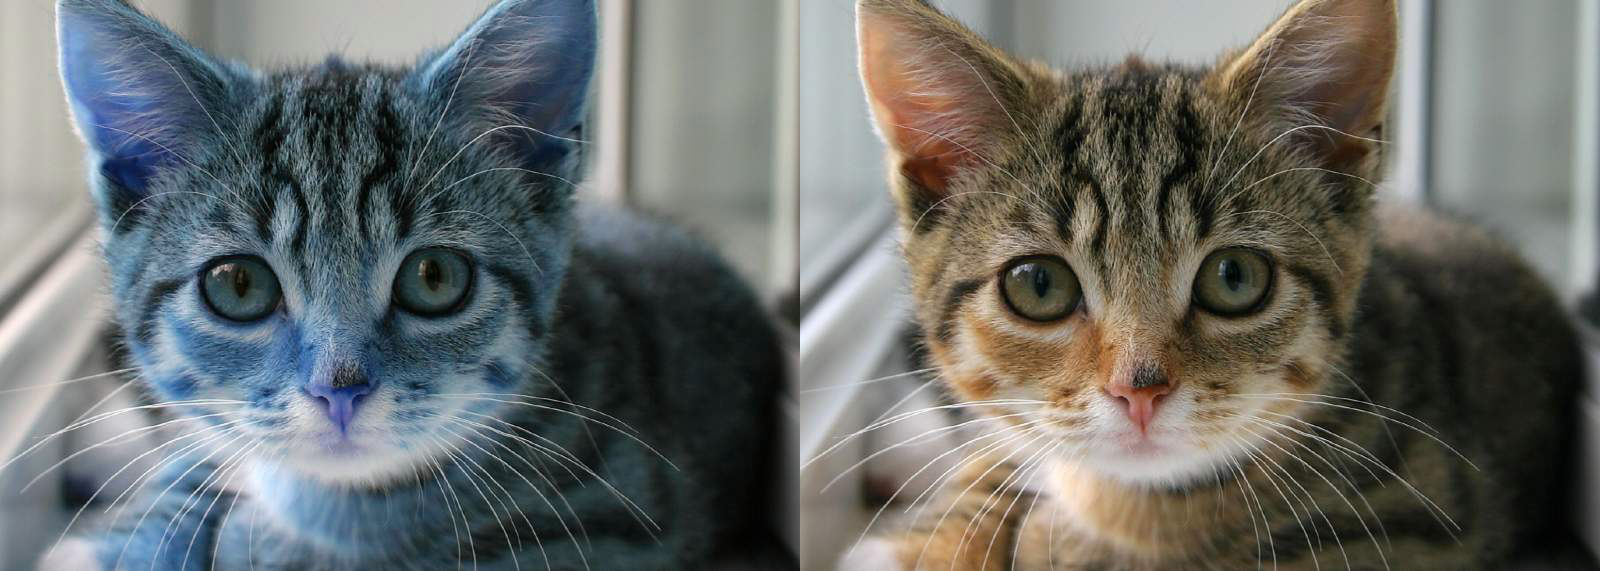

In [22]:
# Creat una lista para almacenar las URLs de las imagenes
urls = ["https://placekitten.com/800/571"]  
# Lee y visualiza la imagen
# Vamos a visualizarlas en un bucle 

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

## Deep learning con animales

Procesamos los datos previamente de manera que cumplan con el formato tf / keras: 

In [45]:
import cv2
url = "https://placekitten.com/800/571"

image = io.imread(url) 
input_modelo = (224, 224)

# resize image
resized = cv2.resize(image, input_modelo)
im_bgr = cv2.cvtColor(resized, cv2.COLOR_RGB2BGR)

x = np.expand_dims(im_bgr, axis=0)
x = preprocess_input(x)

# Entrada al modelo



In [46]:
x.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

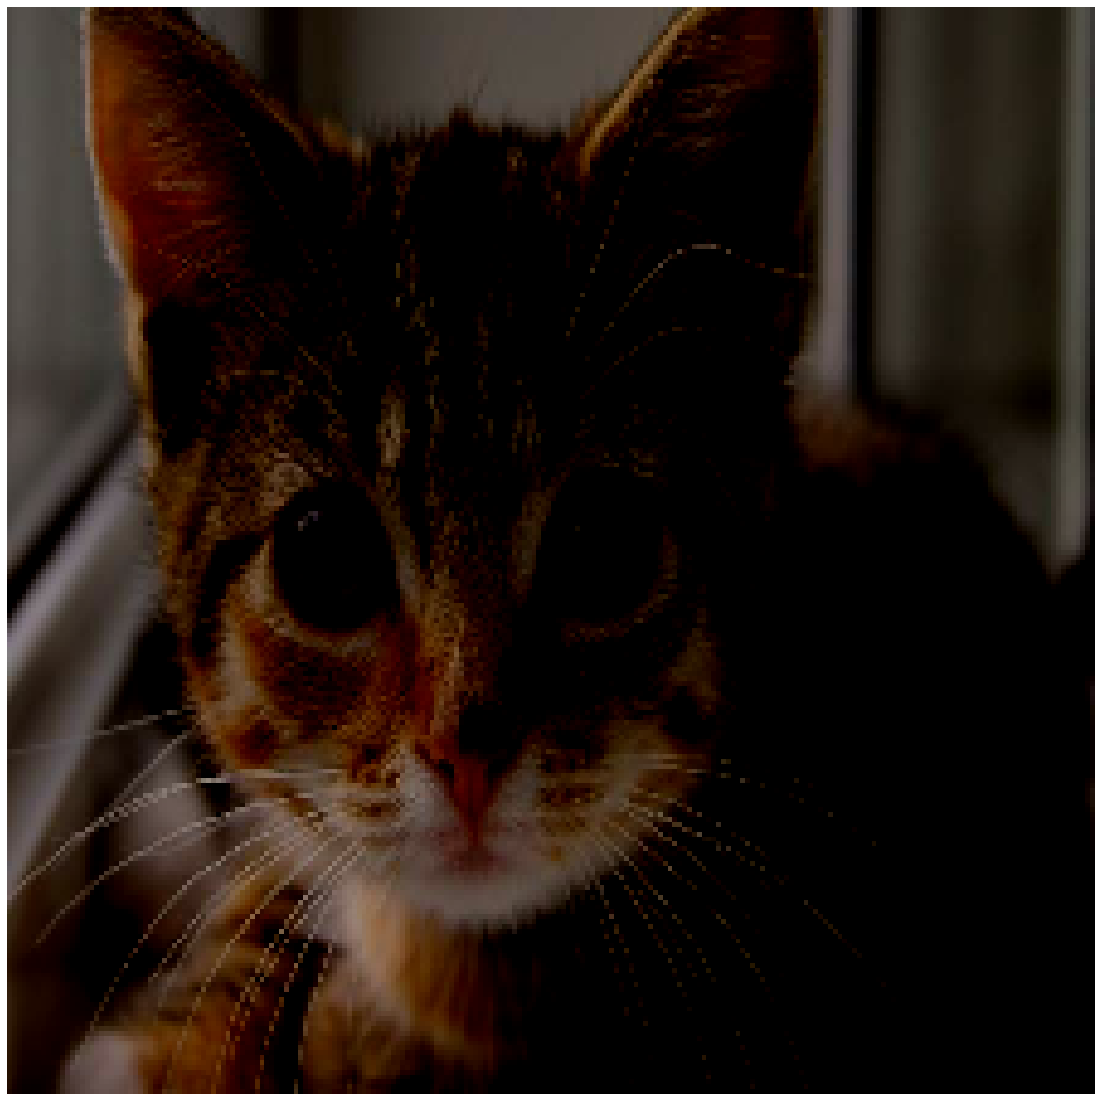

In [51]:
plt.figure(figsize=(20,20))

plt.imshow(x[0]/255.)
plt.axis('off')

# Predecir Resultado

Aplicar modelo a su imagen: 

In [53]:
predictions = model.predict(x)

Veamos qué ha predicho el modelo (¡las predicciones están muy cerca!): 

In [56]:
idx = (-predictions).argsort()[:,:3]
print('Las top predicciones son:\n')
for i_, i in enumerate(idx[0]):
    print(str(i_) + '.', etiquetas[i], '('+str(predictions[:, i][0])+')', '\n')

Las top predicciones son:

0. atigrado, gato atigrado (0.38590023) 

1. gato tigre (0.34922114) 

2. gato egipcio (0.23198318) 



Ahora visualicemos algunos mapas de características de las capas internas del modelo (consulte model.summary() para ver los nombres de los diferentes bloques / capas): 

In [59]:
base_model = VGG19(weights='imagenet')
model_ = Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv4').output)
features = model_.predict(x)

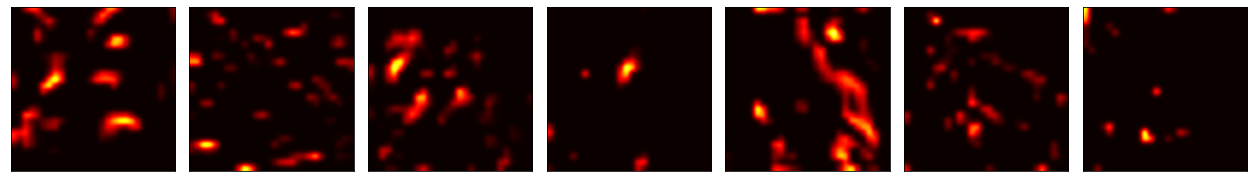

In [60]:
plt.figure(figsize=(20, 20))
n = 8
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(features[0,:,:,i+5], cmap = 'hot', Interpolation = 'Gaussian')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.tight_layout()

Usando tales visualizaciones, podemos obtener una comprensión intuitiva de cómo el modelo "entendió" que un objeto en la imagen era un gato de una raza específica. 

# Tu turno!



![image](https://img.unocero.com/2019/02/yu-gi-oh-nintendo-switch.gif)

Prueba una imagen, la que más curiosidad te entre y mira que te devuelve Imagenet.
